In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import timeit
# import fft
from scipy.fftpack import fft, ifft


In [69]:
# Encoding Function
def encode(data, threshold):
    if len(data) <= threshold:
        return [np.mean(data)]
    mid = len(data) // 2
    return encode(data[:mid], threshold) + encode(data[mid:], threshold)

# Decoding Function
def decode(encoded_data, original_length, threshold):
    if len(encoded_data) == 1:
        return [encoded_data[0]] * original_length
    half_len = original_length // 2
    left = decode(encoded_data[:len(encoded_data)//2], half_len, threshold)
    right = decode(encoded_data[len(encoded_data)//2:], original_length - half_len, threshold)
    return left + right

# Mean Squared Error
def mse(original, reconstructed):
    return np.mean((np.array(original) - np.array(reconstructed)) ** 2)

# FFT Encoding and Decoding
def fft_encode(data):
    return fft(data)

def fft_decode(encoded_data):
    return ifft(encoded_data).real

# Memory Usage
def memory_usage(data):
    return sys.getsizeof(data)

# Precise Runtime Measurement
def measure_runtime(func, *args):
    runtime = timeit.timeit(lambda: func(*args), number=1)
    return runtime
# Random Time Series Test with FFT
def random_time_series_experiment_with_fft(sizes, PCT):
    runtimes_recursive = []
    runtimes_fft = []
    errors_recursive = []
    errors_fft = []
    memory_fft = []
    memory_recursive = []

    for size in sizes:
        np.random.seed(0)
        data = np.random.random(int(size))
        threshold = int(data.shape[0] * PCT /100)

        # Recursive Partition Encoding
        # Measure time more precisely
        start = time.time()
        encoded_recursive = encode(data, threshold)
        end = time.time()
        reconstructed_recursive = decode(encoded_recursive, len(data), threshold)
        runtimes_recursive.append(end - start)
        errors_recursive.append(mse(data, reconstructed_recursive))

        # FFT Encoding
        start = time.time()
        encoded_fft = fft_encode(data)
        end = time.time()
        reconstructed_fft = fft_decode(encoded_fft)
        runtimes_fft.append(end - start)
        errors_fft.append(mse(data, reconstructed_fft))

        # Memory Usage
        memory_fft.append(memory_usage(encoded_fft))
        memory_recursive.append(memory_usage(encoded_recursive))

    dict_results = {
        "Size": sizes,
        "PCT": [PCT] * len(sizes),
        "Recursive Runtime": runtimes_recursive,
        "FFT Runtime": runtimes_fft,
        "Recursive MSE": errors_recursive,
        "FFT MSE": errors_fft,
        "Memory Recursive": memory_recursive,
        "Memory FFT": memory_fft
    }
    results = pd.DataFrame(dict_results)
    return results


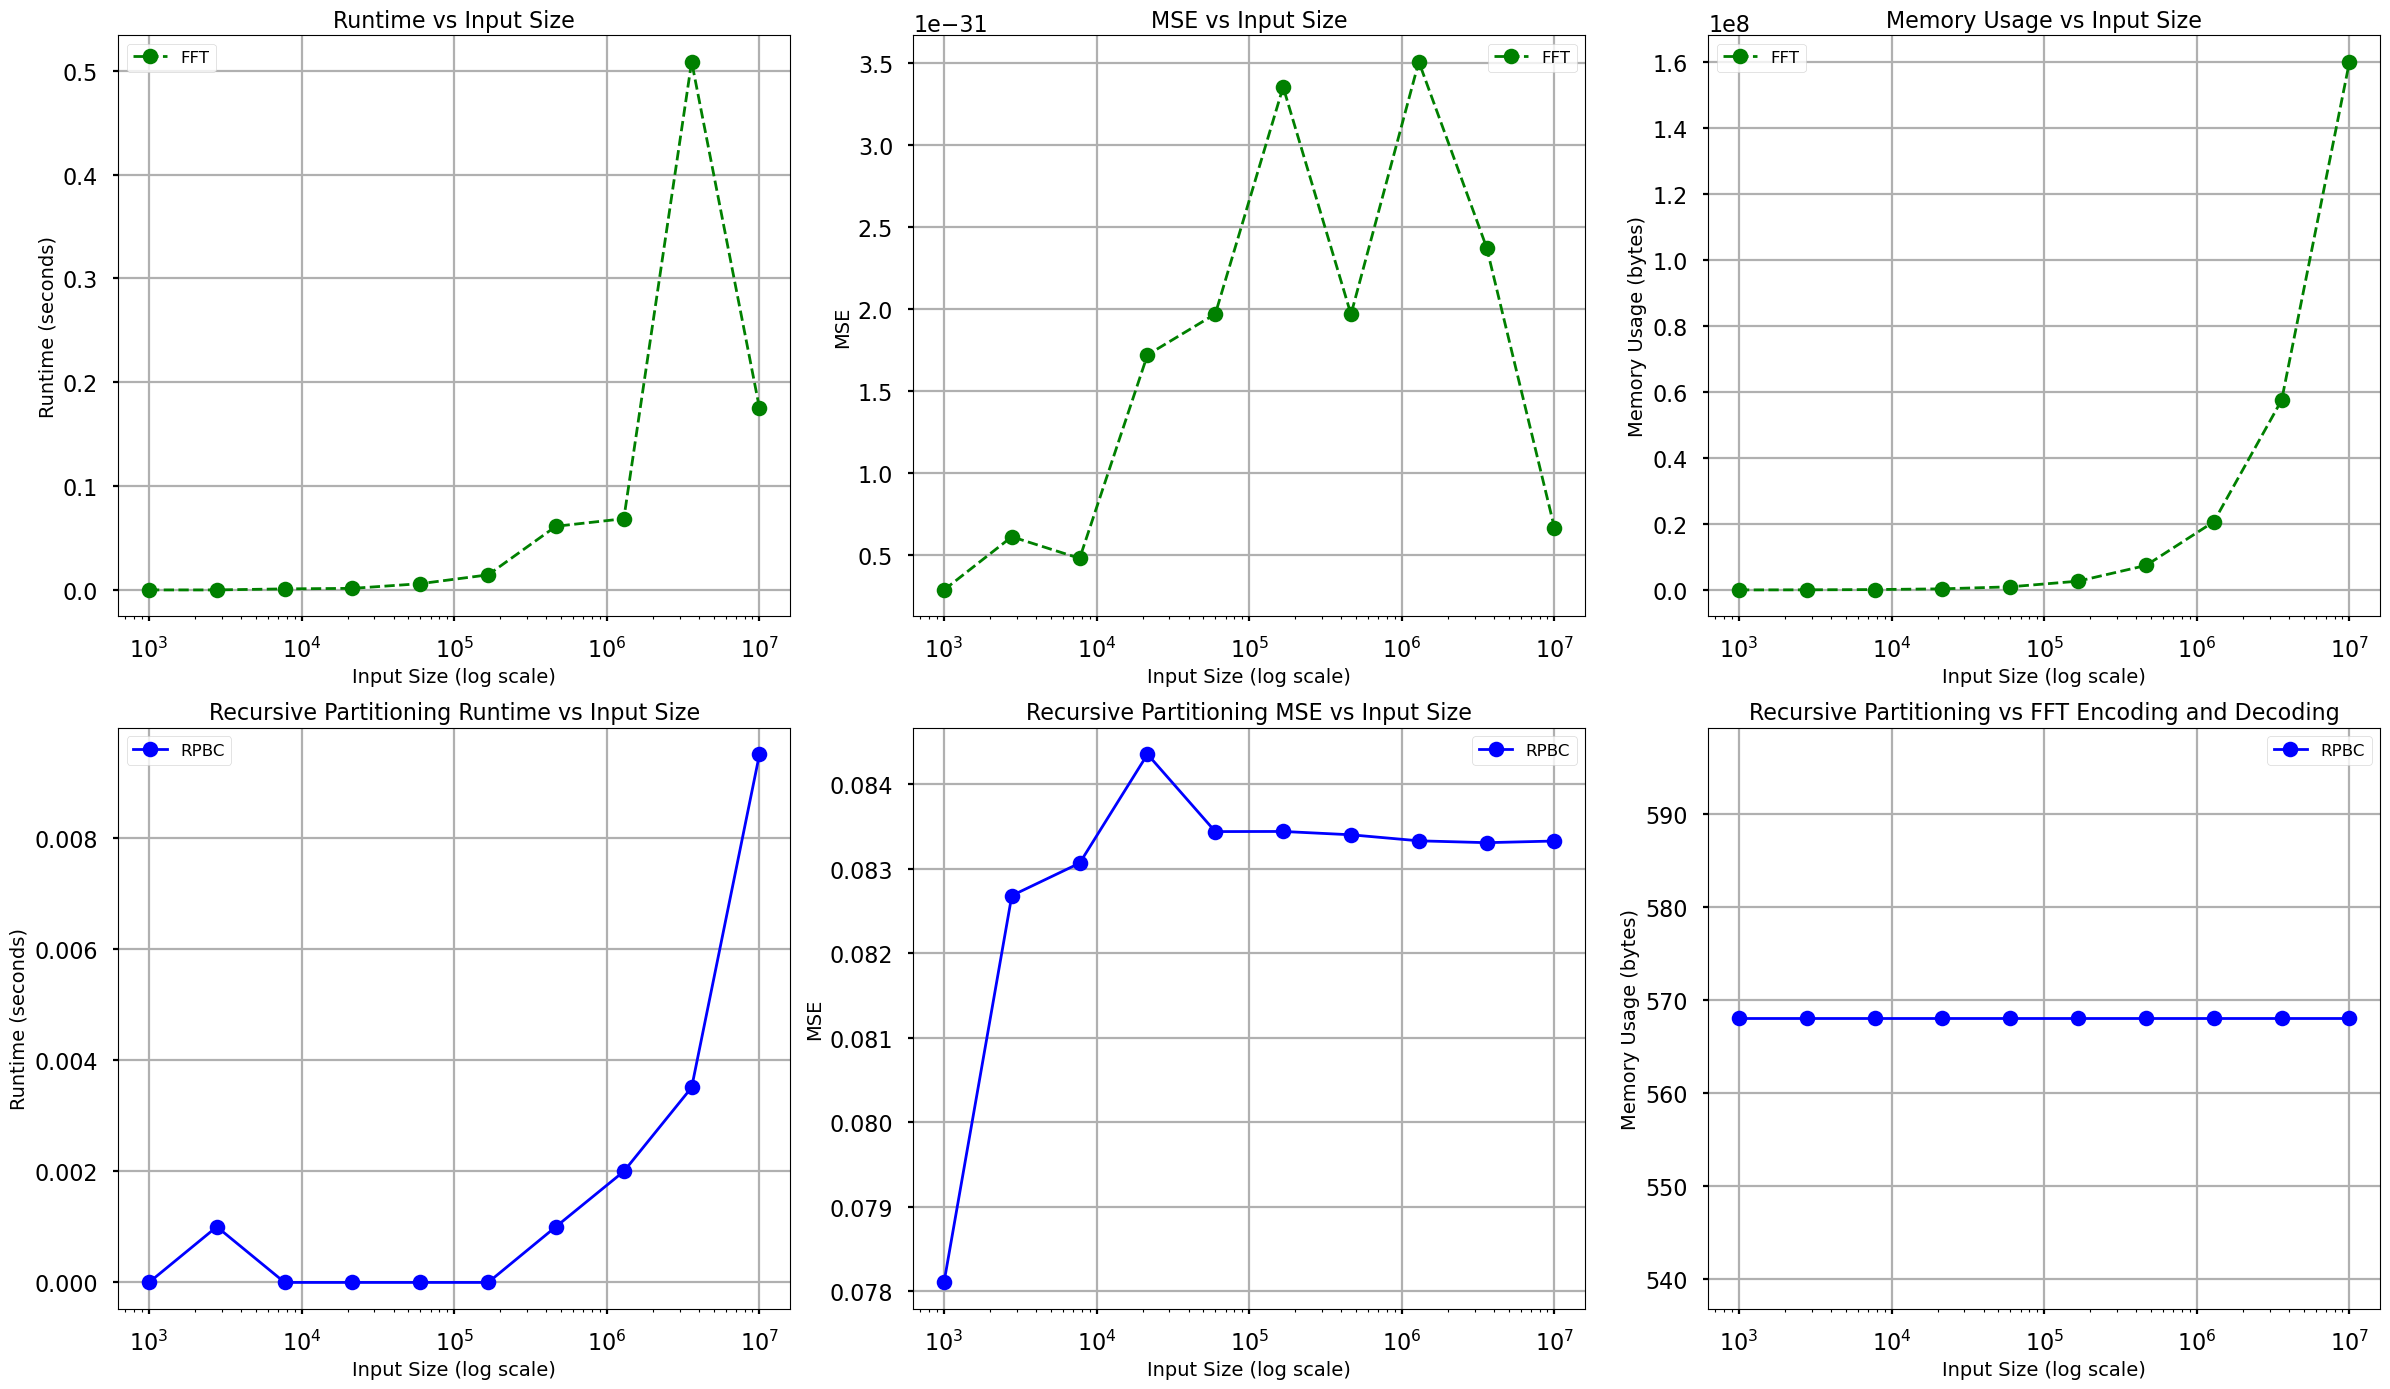

In [3]:

# Run Experiment
sizes = np.logspace(3, 7, num=10, base=10).astype(int)
PCT = 50
results = random_time_series_experiment_with_fft(sizes, PCT)

# Plot Results
plt.style.use('seaborn-v0_8-poster')  # Use a better style for improved aesthetics
plt.figure(figsize=(24, 14))

# Subplot 1: Runtime Comparison
plt.subplot(2, 3, 1)
# plt.plot(sizes, results['Recursive Runtime'], marker='o', label='Recursive Partitioning', linewidth=2)
plt.plot(sizes, results['FFT Runtime'], marker='o', label='FFT', linestyle='--', linewidth=2,color = 'green')
plt.title('Runtime vs Input Size', fontsize=16)
plt.xlabel('Input Size (log scale)', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=12)
plt.grid(True)

# Subplot 2: MSE Comparison
plt.subplot(2, 3, 2)
# plt.plot(sizes, results['Recursive MSE'], marker='o', label='RPBC', linewidth=2)
plt.plot(sizes, results['FFT MSE'], marker='o', label='FFT', linestyle='--', linewidth=2,color = 'green')
plt.title('MSE vs Input Size', fontsize=16)
plt.xlabel('Input Size (log scale)', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=12)
plt.grid(True)

# Subplot 3: Memory Usage Comparison
plt.subplot(2, 3, 3)
# plt.plot(sizes, results['Memory Recursive'], marker='o', label='Recursive Partitioning', linewidth=2)
plt.plot(sizes, results['Memory FFT'], marker='o', label='FFT', linestyle='--', linewidth=2,color = 'green')
plt.title('Memory Usage vs Input Size', fontsize=16)
plt.xlabel('Input Size (log scale)', fontsize=14)
plt.ylabel('Memory Usage (bytes)', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=12)
plt.grid(True)

# Subplot 4: Recursive Partitioning Runtime
plt.subplot(2, 3, 4)
plt.plot(sizes, results['Recursive Runtime'], marker='o', label='RPBC', color='blue', linewidth=2)
plt.title('Recursive Partitioning Runtime vs Input Size', fontsize=16)
plt.xlabel('Input Size (log scale)', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=12)
plt.grid(True)

# Subplot 5: Recursive Partitioning MSE
plt.subplot(2, 3, 5)
plt.plot(sizes, results['Recursive MSE'], marker='o', label='RPBC', color='blue', linewidth=2)
plt.title('Recursive Partitioning MSE vs Input Size', fontsize=16)
plt.xlabel('Input Size (log scale)', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=12)
plt.grid(True)

# Subplot 6: Recursive Partitioning Memory Usage
plt.subplot(2, 3, 6)
plt.plot(sizes, results['Memory Recursive'], marker='o', label='RPBC', color='blue', linewidth=2)
plt.title('Recursive Partitioning Memory Usage vs Input Size', fontsize=16)
plt.xlabel('Input Size (log scale)', fontsize=14)
plt.ylabel('Memory Usage (bytes)', fontsize=14)
plt.xscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.title('Recursive Partitioning vs FFT Encoding and Decoding', fontsize=16)
plt.show()


It shows that 
write important details here

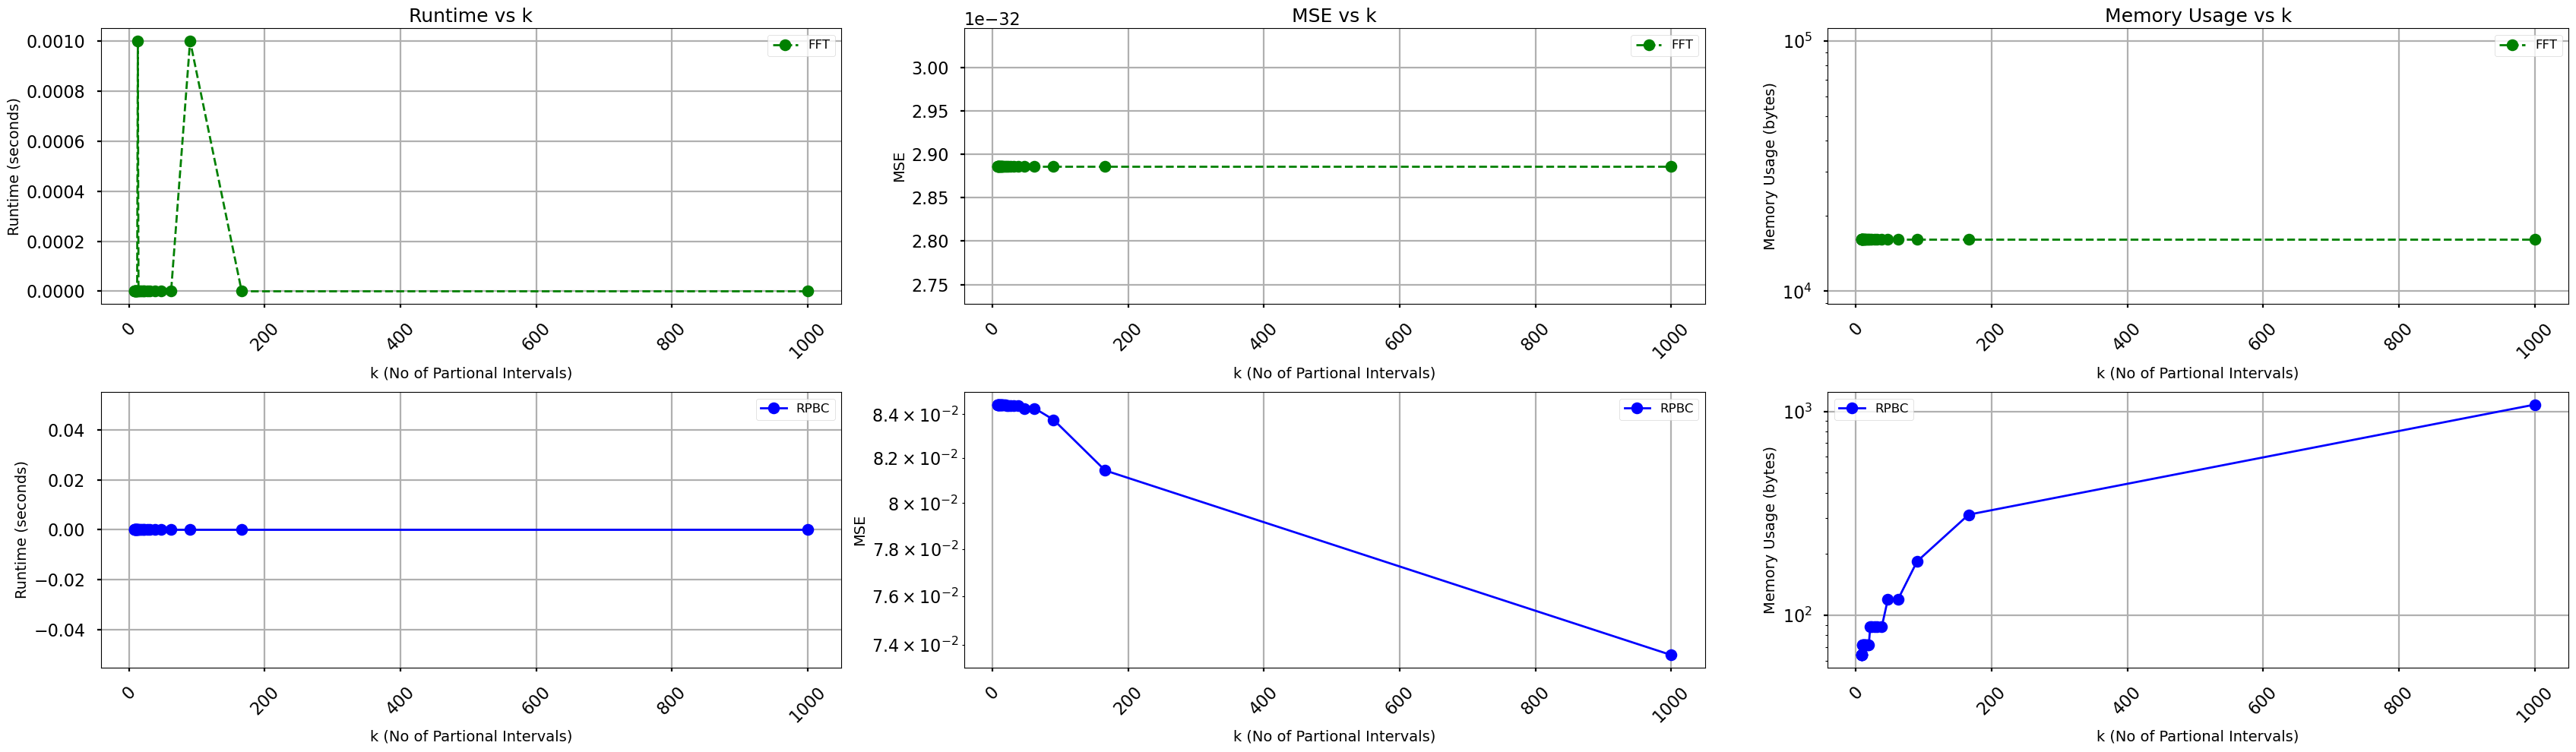

In [27]:
np.random.seed(0)
# Lets fix the size of the input data and see how the runtime and memory usage changes with the threshold value 
sizes = [1e3]

# thresholds = np.linspace(1, 10000, num=100).astype(int)
PCT = np.linspace(start=1, stop=125, num=25).astype(int)
results = pd.DataFrame()
for pct in PCT:
    results_temp = random_time_series_experiment_with_fft(sizes, pct)
    # results_temp['PCT'] = [pct] * len(thresholds)
    results = pd.concat([results, results_temp], axis=0)

results['k'] = results['Size'] / results['PCT']
# results['k'] = results['PCT']
# results['k'] = results.apply(lambda x: f"n/{x[PCT]}%", axis=1)
results['k'] = results['k'].astype(int)
# results['k'] = results['k'].astype(str)
results = results.sort_values(by='k',ascending=True)
# Plot Results
plt.style.use('seaborn-v0_8-poster')  # Use a better style for improved aesthetics
plt.figure(figsize=(34, 10))
# Subplot 1: Runtime Comparison
plt.subplot(2, 3, 1)
# plt.plot(sizes, results['Recursive Runtime'], marker='o', label='Recursive Partitioning', linewidth=2)
plt.plot(results['k'], results['FFT Runtime'], marker='o', label='FFT', linestyle='--', linewidth=2,color = 'green')
plt.title('Runtime vs k', fontsize=18)
plt.xlabel('k (No of Partional Intervals)', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 2: MSE Comparison
plt.subplot(2, 3, 2)
# plt.plot(sizes, results['Recursive MSE'], marker='o', label='RPBC', linewidth=2)
plt.plot(results['k'], results['FFT MSE'], marker='o', label='FFT', linestyle='--', linewidth=2,color = 'green')
plt.title('MSE vs k', fontsize=18)
plt.xlabel('k (No of Partional Intervals)', fontsize=14)
plt.ylabel('MSE', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 3: Memory Usage Comparison
plt.subplot(2, 3, 3)
# plt.plot(sizes, results['Memory Recursive'], marker='o', label='Recursive Partitioning', linewidth=2)
plt.plot(results['k'], results['Memory FFT'], marker='o', label='FFT', linestyle='--', linewidth=2,color = 'green')
plt.title('Memory Usage vs k', fontsize=18)
plt.xlabel('k (No of Partional Intervals)', fontsize=14)
plt.ylabel('Memory Usage (bytes)', fontsize=14)
# plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 4: Recursive Partitioning Runtime
plt.subplot(2, 3, 4)
plt.plot(results['k'], results['Recursive Runtime'], marker='o', label='RPBC', color='blue', linewidth=2)
# plt.title('Recursive Partitioning Runtime vs k', fontsize=16)
plt.xlabel('k (No of Partional Intervals)', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 5: Recursive Partitioning MSE
plt.subplot(2, 3, 5)
plt.plot(results['k'], results['Recursive MSE'], marker='o', label='RPBC', color='blue', linewidth=2)
# plt.title('Recursive Partitioning MSE vs k', fontsize=16)
plt.xlabel('k (No of Partional Intervals)', fontsize=14)
plt.ylabel('MSE', fontsize=14)
# plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Subplot 6: Recursive Partitioning Memory Usage
plt.subplot(2, 3, 6)
plt.plot(results['k'], results['Memory Recursive'], marker='o', label='RPBC', color='blue', linewidth=2)
# plt.title('Recursive Partitioning Memory Usage vs k', fontsize=16)
plt.xlabel('k (No of Partional Intervals)', fontsize=14)
plt.ylabel('Memory Usage (bytes)', fontsize=14)
# plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
# plt.title('Recursive Partitioning vs FFT Encoding and Decoding', fontsize=16)
plt.show()


# Experiment No 02: Kaggle Human Walk Accelerometer Data

In [75]:
# Kaggle Data Experiment with Varying Thresholds
def kaggle_data_experiment_with_fft(data, PCT):
    data = data.to_numpy()
    results = pd.DataFrame()
    size = data.shape[1]  # Fixed size for all rows
    id_counter = 0

    # Metrics Storage
    row_id = []
    pct_val = []
    runtimes_recursive = []
    runtimes_fft = []
    errors_recursive = []
    errors_fft = []
    memory_fft = []
    memory_recursive = []

    for row in data:
        iter = 0
        for pct in PCT:
            
            threshold = int(size * pct / 100)

            # Recursive Partition Encoding (only measure runtime for encoding)
            start = time.perf_counter()
            encoded_recursive = encode(row, threshold)
            end = time.perf_counter()
            reconstructed_recursive = decode(encoded_recursive, size, threshold)

            runtimes_recursive.append(end - start)
            errors_recursive.append(mse(row, reconstructed_recursive))
            memory_recursive.append(memory_usage(encoded_recursive))

            # FFT Encoding (only measure runtime for encoding)
            # if iter == 0:

            #     iter += 1

            start = time.perf_counter()
            encoded_fft = fft_encode(row)
            end = time.perf_counter()
            reconstructed_fft = fft_decode(encoded_fft)

            runtimes_fft.append(end - start)
            errors_fft.append(mse(row, reconstructed_fft))
            memory_fft.append(memory_usage(encoded_fft))

            row_id.append(id_counter)
            pct_val.append(pct)
        id_counter += 1

    # Compile Results
    results = pd.DataFrame({
        "Row ID": row_id,
        "PCT": pct_val,
        "Recursive Runtime": runtimes_recursive,
        "FFT Runtime": runtimes_fft,
        "Recursive MSE": errors_recursive,
        "FFT MSE": errors_fft,
        "Memory Recursive": memory_recursive,
        "Memory FFT": memory_fft
    })

    results['k'] = size / results['PCT']
    results['k'] = results['k'].astype(int).astype(str)
    return results

# Load Kaggle Time Series Data
def load_kaggle_data():
    # Replace with correct file path
    kaggle_file_path = "../data/data.csv"
    df = pd.read_csv(kaggle_file_path)
    df = df[:-1]
    df = df.drop(columns=['Activity', 'subject'])
    return df  # Assuming column name 'values'
def visualize_kaggle_sample(data):
    # Visualize the kaggle data
    # kaggle_data = kaggle_data.drop(columns = "Activity")
    plt.figure(figsize = (30,10))
    plt.plot(data.loc[0,:],label = "Sample 1")
    plt.plot(data.to_numpy().mean(axis = 0),label = "Mean")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.legend()
    plt.xticks([],fontsize = 12)
    plt.title("Kaggle Data Visualization",fontsize = 20)
    plt.show()

In [49]:
def plot_summary(results):
    results['k'] = results['total_no_of_intervals'].astype(int)
    results['k'] = results['k'].astype(int)
    results.sort_values(by='k', inplace=True,ascending=True)
    # Plot Results
    plt.style.use('seaborn-v0_8-poster')
    plt.figure(figsize=(34, 10))

    # Subplot 1: Runtime Comparison
    plt.subplot(2, 3, 1)
    plt.plot(results['k'], results['FFT Runtime'], marker='o', label='FFT', linestyle='--', linewidth=2, color='green')
    plt.title('Runtime vs k', fontsize=18)
    plt.xlabel('k (No of Partional Intervals)', fontsize=14)
    plt.ylabel('Runtime (seconds)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Subplot 2: MSE Comparison
    plt.subplot(2, 3, 2)
    plt.plot(results['k'], results['FFT MSE'], marker='o', label='FFT', linestyle='--', linewidth=2, color='green')
    plt.title('MSE vs k', fontsize=18)
    plt.xlabel('k (No of Partional Intervals)', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Subplot 3: Memory Usage Comparison
    plt.subplot(2, 3, 3)
    plt.plot(results['k'], results['Memory FFT'], marker='o', label='FFT', linestyle='--', linewidth=2, color='green')
    plt.title('Memory Usage vs k', fontsize=18)
    plt.xlabel('k (No of Partional Intervals)', fontsize=14)
    plt.ylabel('Memory Usage (bytes)', fontsize=14)
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.grid(True)

    # Subplot 4: Recursive Partitioning Runtime
    plt.subplot(2, 3, 4)
    plt.plot(results['k'], results['Recursive Runtime'], marker='o', label='RPBC', color='blue', linewidth=2)
    plt.xlabel('k (No of Partional Intervals)', fontsize=14)
    plt.ylabel('Runtime (seconds)', fontsize=14)
    # plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.grid(True)

    # Subplot 5: Recursive Partitioning MSE
    plt.subplot(2, 3, 5)
    plt.plot(results['k'], results['Recursive MSE'], marker='o', label='RPBC', color='blue', linewidth=2)
    plt.xlabel('k (No of Partional Intervals)', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    # plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.grid(True)

    # Subplot 6: Recursive Partitioning Memory Usage
    plt.subplot(2, 3, 6)
    plt.plot(results['k'], results['Memory Recursive'], marker='o', label='RPBC', color='blue', linewidth=2)
    plt.xlabel('k (No of Partional Intervals)', fontsize=14)
    plt.ylabel('Memory Usage (bytes)', fontsize=14)
    # plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


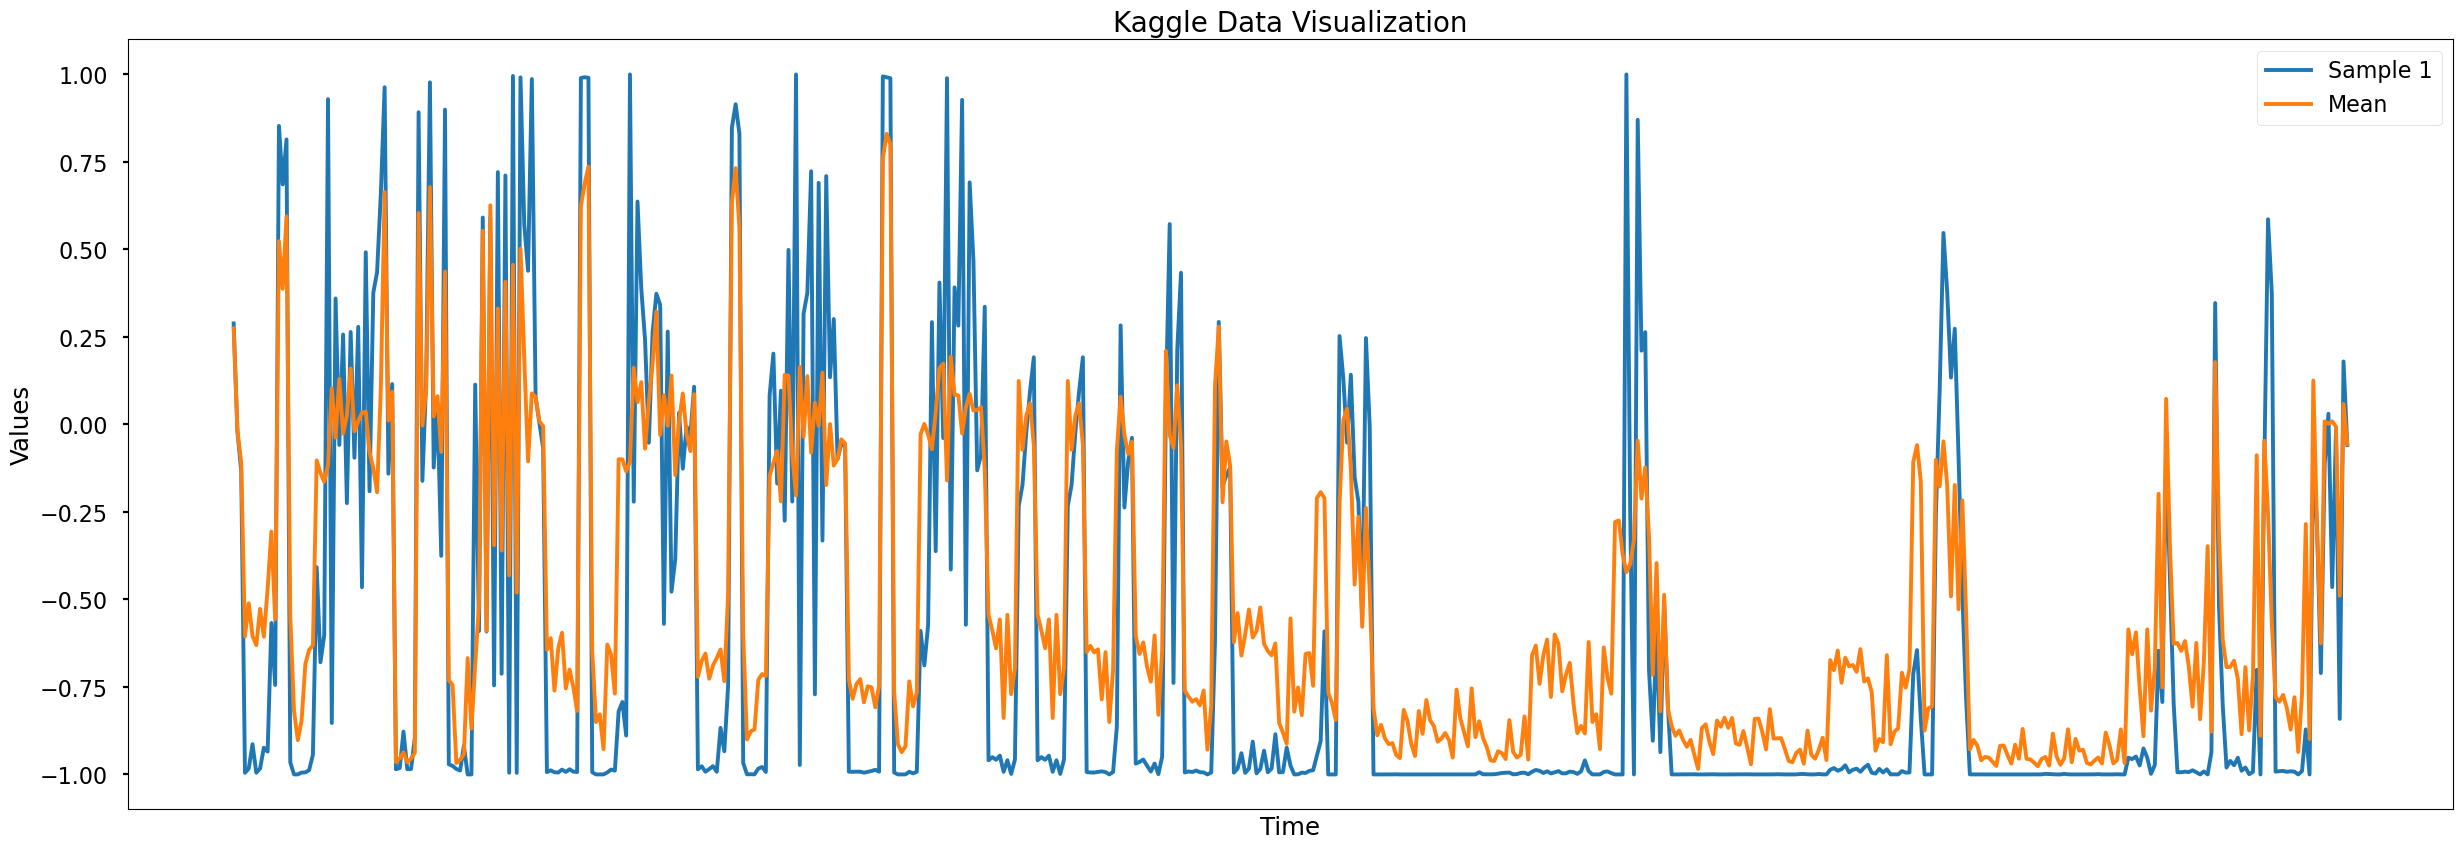

In [14]:
# Run Experiment
kaggle_data = load_kaggle_data()
PCT = np.linspace(start=1, stop=110, num=25).astype(int)
# results = kaggle_data_experiment_with_fft(kaggle_data, PCT)
visualize_kaggle_sample(data = kaggle_data)

Lets test the hypothesis on kaggle

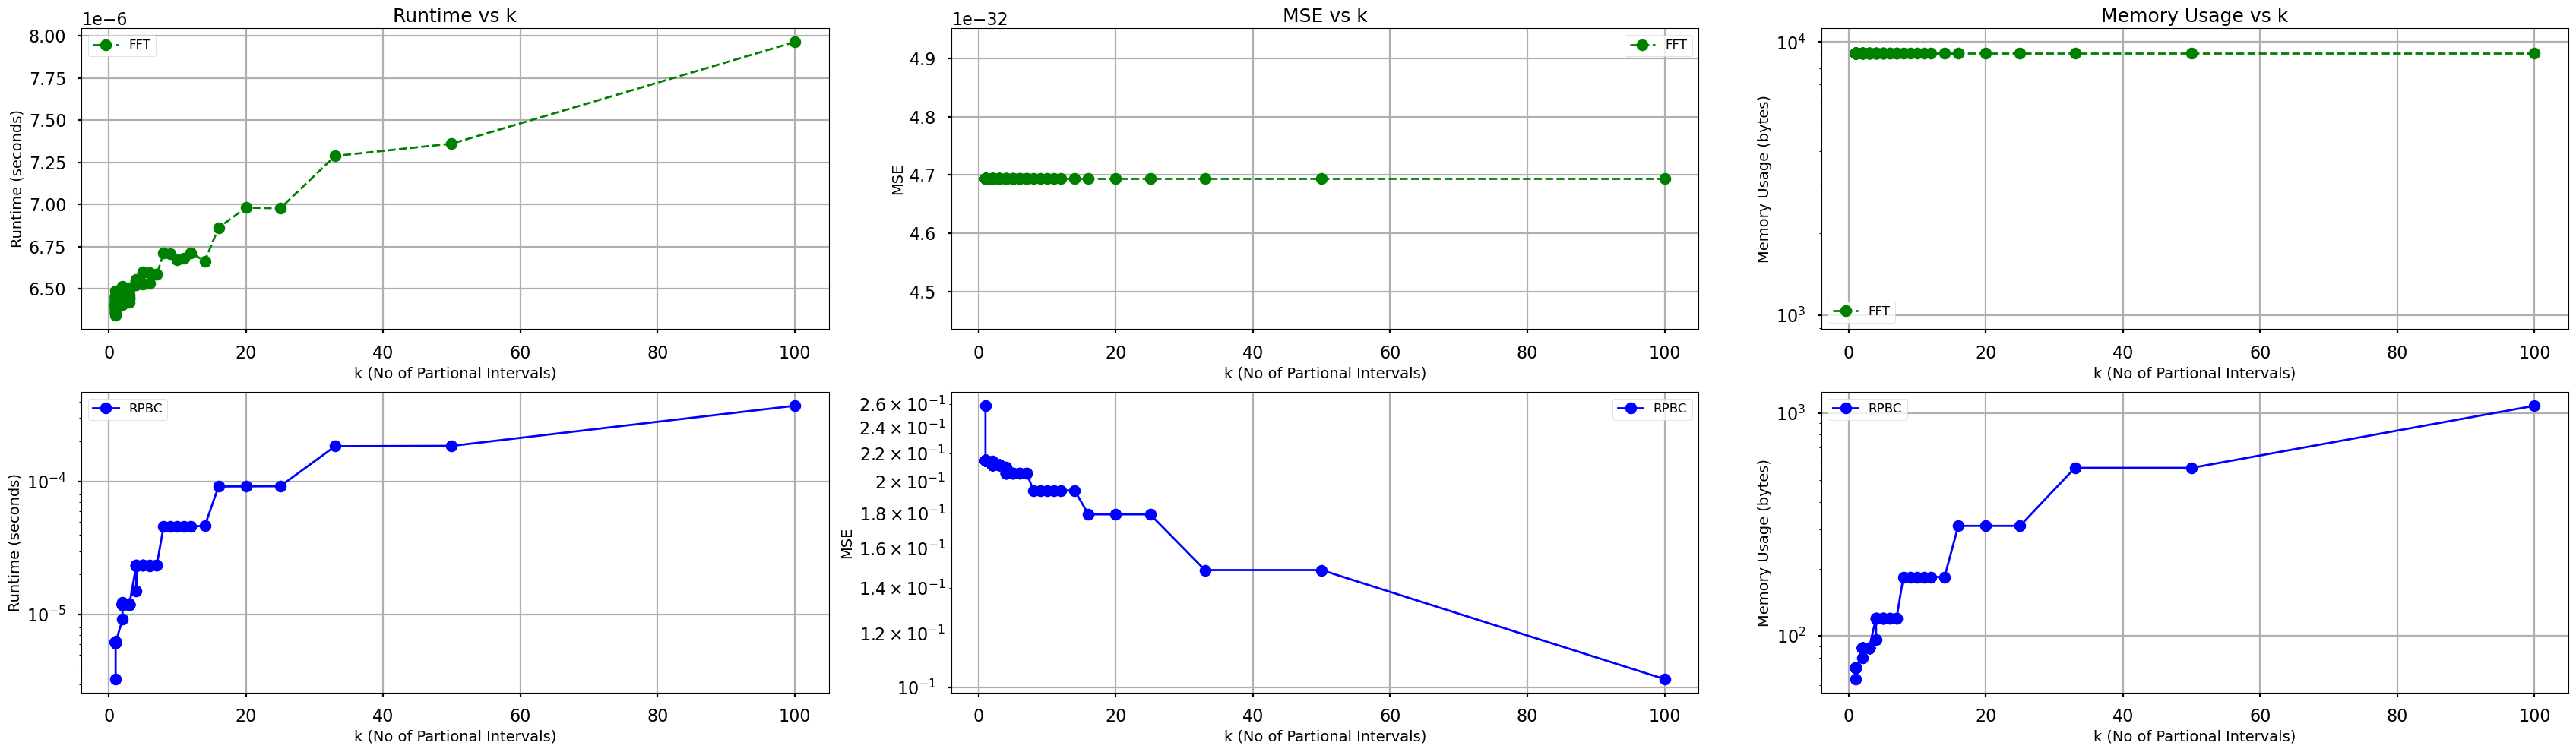

In [50]:
# Run Experiment
kaggle_data = load_kaggle_data()
PCT = np.linspace(start=1, stop=100, num=100).astype(int)
results = kaggle_data_experiment_with_fft(kaggle_data, PCT)
results_df  = results.groupby(["PCT","k"]).mean().reset_index()
results_df['length_of_sub_interval'] = 561 * results_df['PCT']/100 # 561 is the length of the time series - will make it dynamic later
results_df['total_no_of_intervals'] = 561 / results_df['length_of_sub_interval']
plot_summary(results_df)
# grouped

In [53]:
results_df

,PCT,k,Row ID,Recursive Runtime,FFT Runtime,Recursive MSE,FFT MSE,Memory Recursive,Memory FFT,length_of_sub_interval,total_no_of_intervals
99,100,1,3675.0,0.000003,0.000006,0.258241,4.693659e-32,64.0,9088.0,561.00,1.000000
71,72,1,3675.0,0.000006,0.000006,0.214986,4.693659e-32,72.0,9088.0,403.92,1.388889
70,71,1,3675.0,0.000006,0.000006,0.214986,4.693659e-32,72.0,9088.0,398.31,1.408451
69,70,1,3675.0,0.000006,0.000006,0.214986,4.693659e-32,72.0,9088.0,392.70,1.428571
68,69,1,3675.0,0.000006,0.000006,0.214986,4.693659e-32,72.0,9088.0,387.09,1.449275
...,...,...,...,...,...,...,...,...,...,...,...
4,5,20,3675.0,0.000092,0.000007,0.179176,4.693659e-32,312.0,9088.0,28.05,20.000000
3,4,25,3675.0,0.000092,0.000007,0.179176,4.693659e-32,312.0,9088.0,22.44,25.000000
2,3,33,3675.0,0.000184,0.000007,0.148520,4.693659e-32,568.0,9088.0,16.83,33.333333
1,2,50,3675.0,0.000185,0.000007,0.148520,4.693659e-32,568.0,9088.0,11.22,50.000000


# Visualization at the best found parameters

1. The most efficient found value of k for the given dataset is : 
2. Plot few random samples against those k and see how if it comparable to the fft and brute force
3. Get few figures out: 

Show some bad examples, good examples

Do the same for both datasets


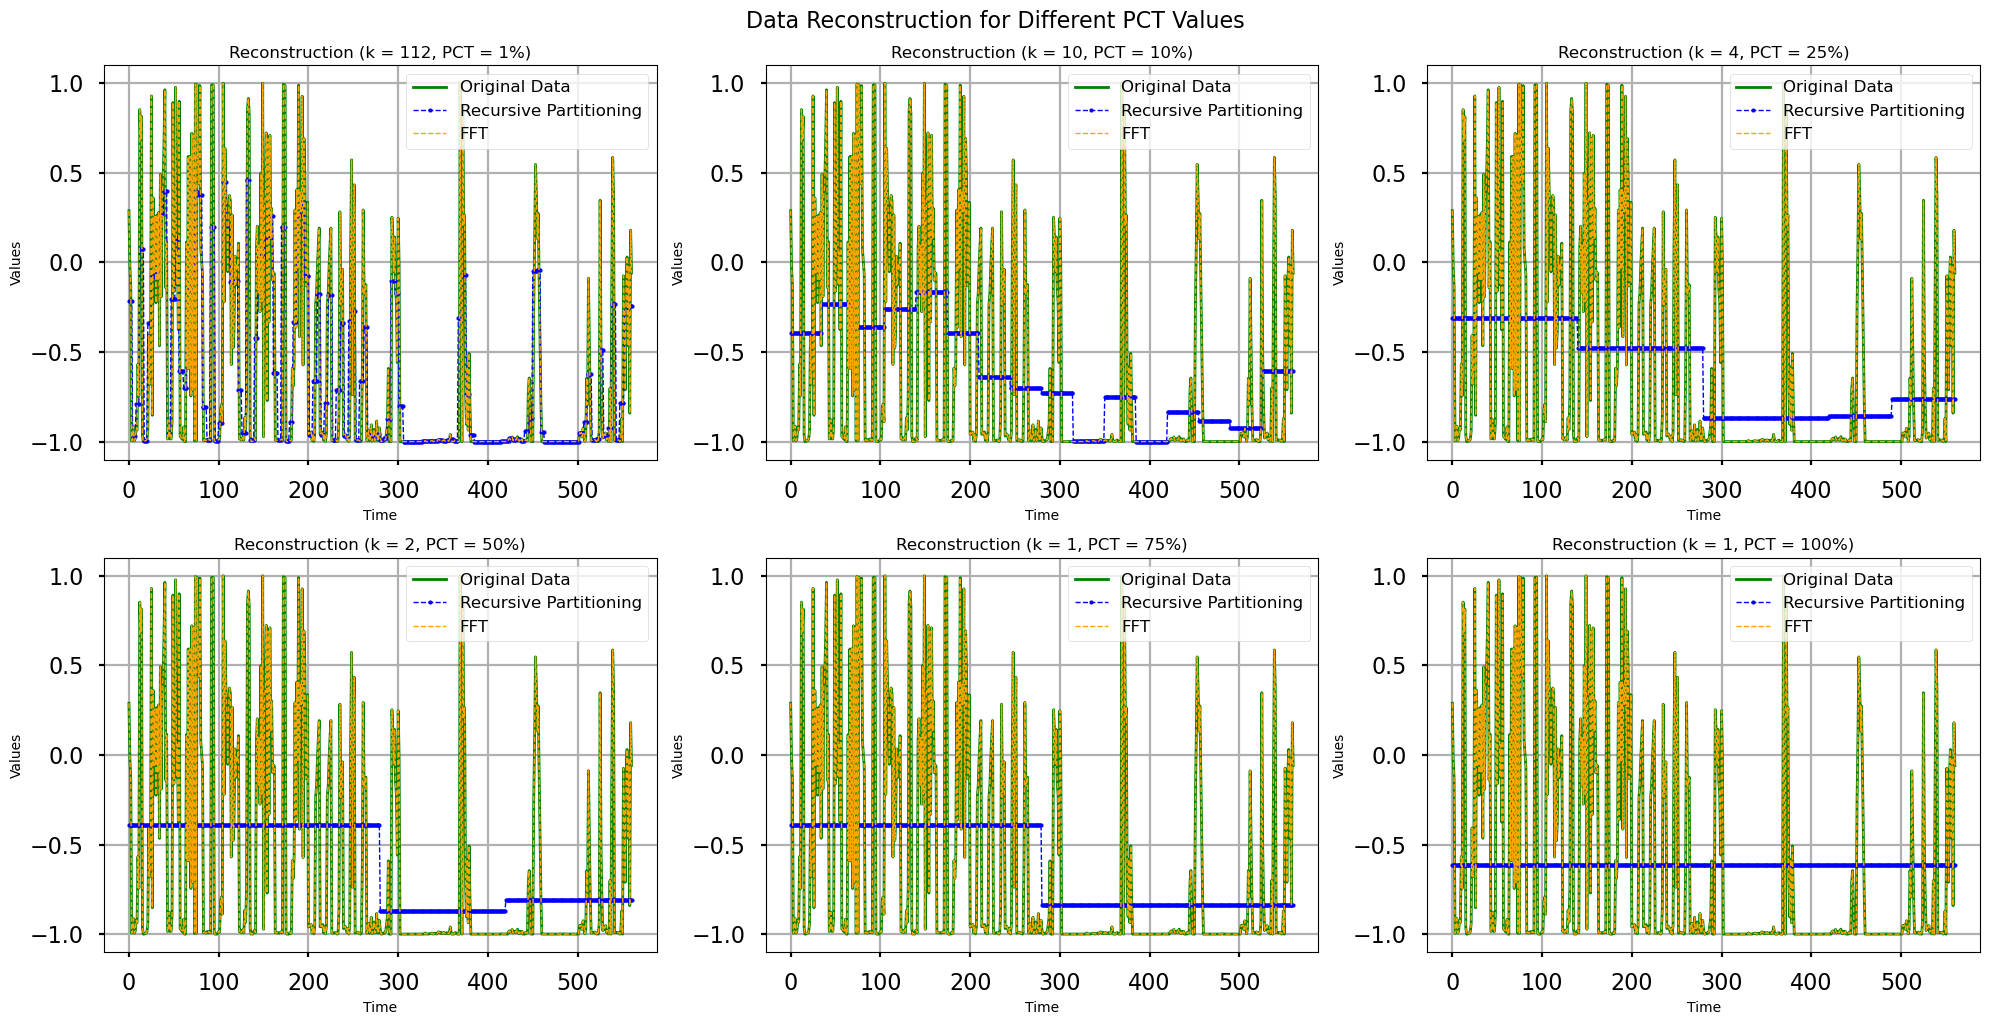

In [80]:
from scipy.fftpack import fft, ifft
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sys
np.random.seed(0)

# Encoding Function
def encode(data, threshold):
    if len(data) <= threshold:
        return [np.mean(data)]
    mid = len(data) // 2
    return encode(data[:mid], threshold) + encode(data[mid:], threshold)

# Decoding Function
def decode(encoded_data, original_length, threshold):
    if len(encoded_data) == 1:
        return [encoded_data[0]] * original_length
    half_len = original_length // 2
    left = decode(encoded_data[:len(encoded_data)//2], half_len, threshold)
    right = decode(encoded_data[len(encoded_data)//2:], original_length - half_len, threshold)
    return left + right

# FFT Encoding and Decoding
def fft_encode(data):
    return fft(data)

def fft_decode(encoded_data):
    return ifft(encoded_data).real

# Function to visualize reconstruction in a single figure with subplots
def visualize_reconstruction_subplot(sample_data, pct_list):
    num_plots = len(pct_list)
    plt.figure(figsize=(20, 10))

    for i, pct in enumerate(pct_list, 1):
        length_of_sub_interval = int(sample_data.shape[0] * pct / 100)
        total_no_of_intervals = int(sample_data.shape[0] / length_of_sub_interval)
        threshold = int(sample_data.shape[0] * pct / 100)

        # Encoding and decoding
        encoded_recursive = encode(sample_data, threshold)
        reconstructed_recursive = decode(encoded_recursive, len(sample_data), threshold)
        encoded_fft = fft_encode(sample_data)
        reconstructed_fft = fft_decode(encoded_fft)

        # Subplot for each PCT value
        plt.subplot(2, (num_plots + 1) // 2, i)
        plt.plot(sample_data, label="Original Data", color="green", linewidth=2)
        plt.plot(reconstructed_recursive, label="Recursive Partitioning", color='blue', linestyle='--', marker='o', linewidth=1, markersize=3)
        plt.plot(reconstructed_fft, label="FFT", color='orange', linestyle='--', marker='x', linewidth=1, markersize=3)
        plt.title(f"Reconstruction (k = {total_no_of_intervals}, PCT = {pct}%)", fontsize=12)
        plt.xlabel("Time", fontsize=10)
        plt.ylabel("Values", fontsize=10)
        plt.legend(fontsize=12)
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle("Data Reconstruction for Different PCT Values", fontsize=16, y=1.02)
    plt.show()

# Load data and visualize for PCT values
kaggle_data = load_kaggle_data()
data = kaggle_data.to_numpy()
sample_data = data[0]  # Use first row as sample

pct_list = [1, 10, 25, 50, 75, 100]  # PCT values
visualize_reconstruction_subplot(sample_data, pct_list)
